In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# MNIST Fashion Dataset
# Includes 60,000 images for training and 10,000 images for validation/testing

fashion_mnist = keras.datasets.fashion_mnist    # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()    # split into testing and training data

In [4]:
train_images.shape      # gives back (60000, 28, 28), which stands for no. of pictures, pixel width and pixel height (784 pixels in total per picture)

# type(train_images)    # numpy array

(60000, 28, 28)

In [5]:
train_images[0, 23, 23]     # look at pixel in picture 0, position 23 23 and print its color
# pixel values are between 0 and 255
# print(train_images[0])

194

In [6]:
train_labels[:10]   # integers ranging from 0 to 9

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

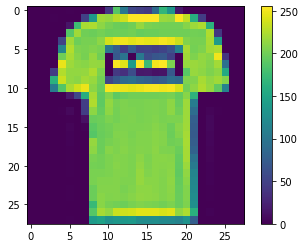

In [8]:
# everything we need to do with matplotlib to show an image

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
# plt.grid(False)
plt.show()

In [9]:
# Data preprocessing

# here we squish all the data between 0 and 1, because we know all our data is 0-255, we just divide everything with 255
# take off the load from neural network by feeding it smaller data

train_images = train_images/255
test_images = test_images/255

In [10]:
# Building the model

model = keras.Sequential([
    # Flatten takes the shape and transforms it into a single line with, in this case, 784 pixels (28*28)
    keras.layers.Flatten(input_shape=(28, 28)),     # input layer (1)
    # 128 neurons (randomly picked, usually good to be as low as possible but not to low)
    keras.layers.Dense(128, activation='relu'),     # hidden layer (2)
    # 10 output neurons for 10 clothing classes we have
    keras.layers.Dense(10, activation='softmax')    # output layer (3)
])

In [11]:
# Compiling the module

model.compile(optimizer='adam',     # performs a gradient descent
              loss='sparse_categorical_crossentropy',   # look up how it works
              metrics=['accuracy'])     # output we want to see from the network

In [12]:
# Training the model

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5053 - accuracy: 0.8220
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3783 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2986 - accuracy: 0.8912


In [13]:
# Testing the model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8743
Test accuracy: 0.8743000030517578


In [14]:
# When test accuracy is lower than training accuracy, that's called overfitting and we overtrained our model
# In that case we need to tweak some of the parameters inside our model, like node numbers or number of epochs

[2.8743332e-05 2.8173906e-06 9.7135899e-06 4.6398450e-06 1.4939080e-06
 1.5426983e-01 9.4942952e-06 7.7710396e-01 6.8560898e-02 8.3998557e-06]
Sneaker


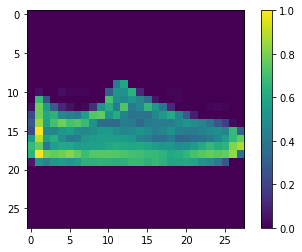

In [15]:
# Predictions
a = 12
predictions = model.predict(test_images)

# Here the result of prediction of a single image will we 10 values because we have 10 neurons (which is 10 classes model can pick from), where those values will all sum to 1 and will represent how much they correspond to a specific class
print(predictions[a])
print(class_names[np.argmax(predictions[a])])    # return the index of the maximum value of the image prediction

# predictions = model.predict([test_images[0]])     # predicting a single image (it still needs to be in an array)

# compare result of prediction with a corresponding picture it predicted
plt.figure()
plt.imshow(test_images[a])
plt.colorbar()
plt.show()

In [16]:
test_images.shape

(10000, 28, 28)

<class 'numpy.uint8'>


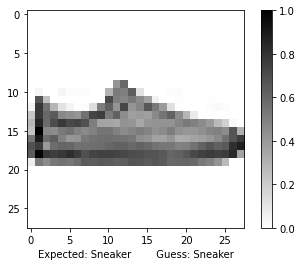

In [17]:
COLOR = 'black'
# for changing label colors in plot
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    prediction = model.predict(np.array([image]))   # pass a single image to predict
    predicted_class = class_names[np.argmax(prediction)]    # get prediction result

    show_image(image, class_names[correct_label], predicted_class)

    # print("Expected:", class_names[correct_label], "    Guess:", predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    # plt.title("Expected: " + label)
    plt.xlabel("Expected: " + label + "        Guess: " + guess)
    plt.colorbar()
    plt.show()

def get_number():
    while True:
        num = input('Pick a number: ')
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print('Try again...')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)